In [27]:
import pandas as pd
import geopandas as gpd
import rasterio
from rasterstats import zonal_stats
import numpy as np

In [15]:
# Opening a raster file
src = rasterio.open("git/Locust-Covid19/my_package/data/input/crops/Crops_IGBP.tif")

In [16]:
# How many bands does it contain?
src.count

1

In [17]:
# How many pixels?
src.width, src.height

(8350, 9276)

In [18]:
src.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.4028234663852886e+38,
 'width': 8350,
 'height': 9276,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["Lambert Azimuthal Equal Area Sphere 19",GEOGCS["GCS_Sphere_ARC_INFO",DATUM["Sphere_ARC_INFO",SPHEROID["Sphere_ARC_INFO",6370997,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",5],PARAMETER["longitude_of_center",20],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]'),
 'transform': Affine(1000.0, 0.0, -4458500.0,
        0.0, -1000.0, 4480500.0)}

In [19]:
src.dataset_mask()

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [20]:
src.crs

CRS.from_wkt('PROJCS["Lambert Azimuthal Equal Area Sphere 19",GEOGCS["GCS_Sphere_ARC_INFO",DATUM["Sphere_ARC_INFO",SPHEROID["Sphere_ARC_INFO",6370997,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",5],PARAMETER["longitude_of_center",20],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]')

In [21]:
src.crs.data

{'proj': 'laea',
 'lat_0': 5,
 'lon_0': 20,
 'x_0': 0,
 'y_0': 0,
 'a': 6370997,
 'b': 6370997,
 'units': 'm',
 'no_defs': True}

In [22]:
src.bounds

BoundingBox(left=-4458500.0, bottom=-4795500.0, right=3891500.0, top=4480500.0)

In [23]:
{i: dtype for i, dtype in zip(src.indexes, src.dtypes)}

{1: 'float32'}

In [30]:
type(src)

rasterio.io.DatasetReader

In [29]:
np.sum(np.sum(src))

<open DatasetReader name='git/Locust-Covid19/my_package/data/input/crops/Crops_IGBP.tif' mode='r'>

In [12]:
src.info

AttributeError: 'DatasetReader' object has no attribute 'info'

In [32]:
band1 = src.read(1)

In [42]:
type(band1)

numpy.ndarray

In [43]:
# Data type of the values
band1.dtype

dtype('float32')

In [33]:
# Count pixels image (1s)
np.sum(np.sum(band1))

1777685.0

In [44]:
print(band1.min())
print(band1.mean())
print(np.median(band1))
print(band1.max())

0.0
0.022951316
0.0
1.0


In [38]:
heigh, width, dummy = np.size(band1)

TypeError: cannot unpack non-iterable int object

In [39]:
# Calculate all pixels of image, including 0s
print(np.size(band1))

77454600


In [40]:
print(band1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
# comprobar si solo tiene 0s y 1s:
if np.sum(np.sum(band1)) == np.size(band1): #solo tiene 1s
    print("only 1s")
elif np.sum(np.sum(band1)): #tiene unos y ceros
    print("1s and 0s")
else: #tiene 0s
    print("only 0s")

1s and 0s


In [14]:
for property, value in vars(src).iteritems():
    print(property, ": ", value)

AttributeError: 'dict' object has no attribute 'iteritems'

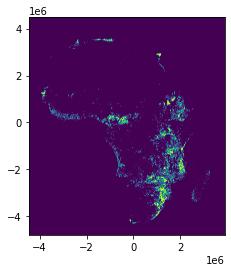

In [25]:
# Plotting
import rasterio.plot
import matplotlib.pyplot as plt

rasterio.plot.show(src)

In [ ]:
land_cover_Africa = "git/Locust-Covid19/my_package/data/input/crops/afigbpl20.tif"